## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

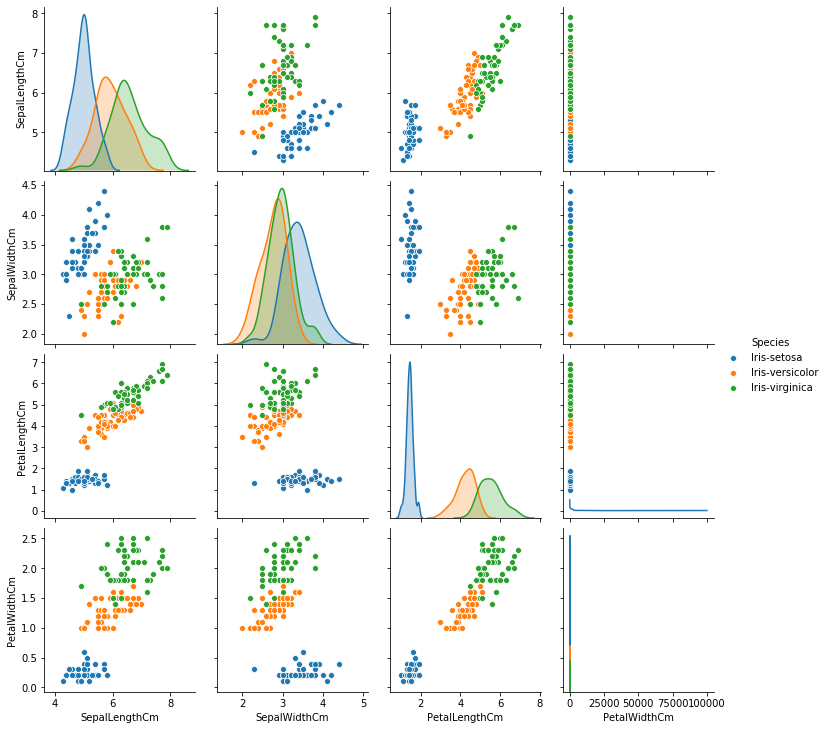

Точность нейронной сети 98.03%


In [25]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
np.random.seed(0)

w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [26]:
# создадим UDF нейронной сети

def nn(X_train, y_train, learning_rate=0.1, epochs=100000, random_state=0):
    
    np.random.seed(random_state)
    
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = learning_rate

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

    return accuracy


In [39]:
# попробуем подобрать скорость обучения

for l in (0.0001, 0.001, 0.01, 0.1, 1):
    
    print("Скорость обучения " + str(l))
    print("Точность нейронной сети " + str(round(nn(X_train, y_train, learning_rate=l),2)) + "%")
    print()

Скорость обучения 0.0001
Точность нейронной сети 77.5%

Скорость обучения 0.001
Точность нейронной сети 90.13%

Скорость обучения 0.01
Точность нейронной сети 98.31%

Скорость обучения 0.1
Точность нейронной сети 98.03%

Скорость обучения 1
Точность нейронной сети 56.0%



In [40]:
# попробуем подобрать количество итераций обучения

for e in (100, 1000, 10000, 100000, 1000000):
    
    print("Кол-во итераций " + str(e))
    print("Точность нейронной сети " + str(round(nn(X_train, y_train, epochs=e),2)) + "%")
    print()

Кол-во итераций 100
Точность нейронной сети 77.46%

Кол-во итераций 1000
Точность нейронной сети 90.15%

Кол-во итераций 10000
Точность нейронной сети 98.31%

Кол-во итераций 100000
Точность нейронной сети 98.03%

Кол-во итераций 1000000
Точность нейронной сети 98.04%



In [41]:
# попробуем подобрать скорость обучения и количество итераций обучения

for l in (0.0001, 0.001, 0.01, 0.1, 1):
    
    for e in (100, 1000, 10000, 100000, 1000000):
    
        print("Скорость обучения " + str(l))
        print("Кол-во итераций " + str(e))
        print("Точность нейронной сети " + str(round(nn(X_train, y_train, learning_rate=l, epochs=e),2)) + "%")
        print()

Скорость обучения 0.0001
Кол-во итераций 100
Точность нейронной сети 49.06%

Скорость обучения 0.0001
Кол-во итераций 1000
Точность нейронной сети 53.18%

Скорость обучения 0.0001
Кол-во итераций 10000
Точность нейронной сети 56.58%

Скорость обучения 0.0001
Кол-во итераций 100000
Точность нейронной сети 77.5%

Скорость обучения 0.0001
Кол-во итераций 1000000
Точность нейронной сети 90.13%

Скорость обучения 0.001
Кол-во итераций 100
Точность нейронной сети 53.17%

Скорость обучения 0.001
Кол-во итераций 1000
Точность нейронной сети 56.57%

Скорость обучения 0.001
Кол-во итераций 10000
Точность нейронной сети 77.5%

Скорость обучения 0.001
Кол-во итераций 100000
Точность нейронной сети 90.13%

Скорость обучения 0.001
Кол-во итераций 1000000
Точность нейронной сети 98.31%

Скорость обучения 0.01
Кол-во итераций 100
Точность нейронной сети 56.56%

Скорость обучения 0.01
Кол-во итераций 1000
Точность нейронной сети 77.49%

Скорость обучения 0.01
Кол-во итераций 10000
Точность нейронной се

In [42]:
# Выводы:

# Регулируя скорость обучения и кол-во итераций обучения мы можем влиять на качетсво работы нейросети.
# При слишком большом параметре learning_rate алгоритм градиентного спуска не может найти глобальный минимум.
# При этом, чем меньше мы зададим значение learning_rate, тем большее кол-во итераций (epochs) обучения нужно совершить.
# Для улучшения качества базового прогноза (98.03%) логично одновременно перебирать разные комбинации
# learning_rate и epochs.

# Лучшее качество дают следующие сочетания:

# Скорость обучения 0.001
# Кол-во итераций 1000000
# Точность нейронной сети 98.31%

# Скорость обучения 0.01
# Кол-во итераций 100000
# Точность нейронной сети 98.31%